# Lliurament tasca 6A

## Exercici 1: Scatter plots

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

In [2]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**``%_tipped``**: Quin percentatge de propina han donat els clients en relació al compte?

In [3]:
tips['%_tipped'] = round(tips['tip'] / tips['total_bill'] * 100, 2)

**``indiv_tip``**: Quanta propina ha posat de mitjana cada membre de la taula? (propina/comensals)

In [4]:
tips['indiv_tip'] = round(tips['tip'] / tips['size'], 2)

**``%_indiv_tip``**: Quin percentatge del compte ha posat com a propina, de mitjana, cada comensal?

In [5]:
tips['%_indiv_tip'] = round(tips['%_tipped'] / tips['size'], 2)

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,%_tipped,indiv_tip,%_indiv_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,0.50,2.97
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,0.55,5.35
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,1.17,5.55
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,1.66,6.99
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,0.90,3.67


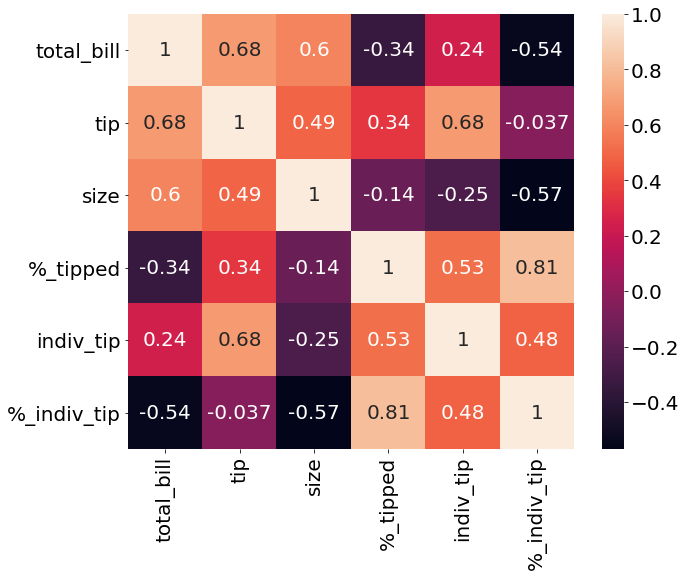

In [7]:
sns.heatmap(tips.corr(), annot=True)
plt.show()

Veiem que no hi ha cap correlació especialment forta, excepte per a aquelles variables que hem combinat per a crear-ne de noves. A continuació mirarem les relacions entre variables categòriques. 

### Dues variables: ``indiv_tip`` i ``day``

Farem servir la variable discreta ``day`` com a variable categòrica per a aquest scatter plot. Volem veure si la mitjana de propina per comensal tendeix a augmentar o a disminuir en diferents dies.

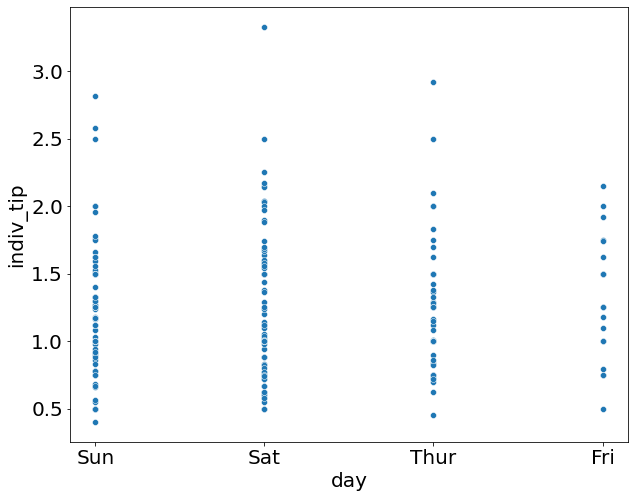

In [8]:
sns.scatterplot(x='day', y='indiv_tip', data=tips)
plt.show()

Sembla ser que els dissabtes la mitjana de propines per individu augmenta una mica.

### Tres variables: ``%_tipped``, ``total_bill`` i ``day``

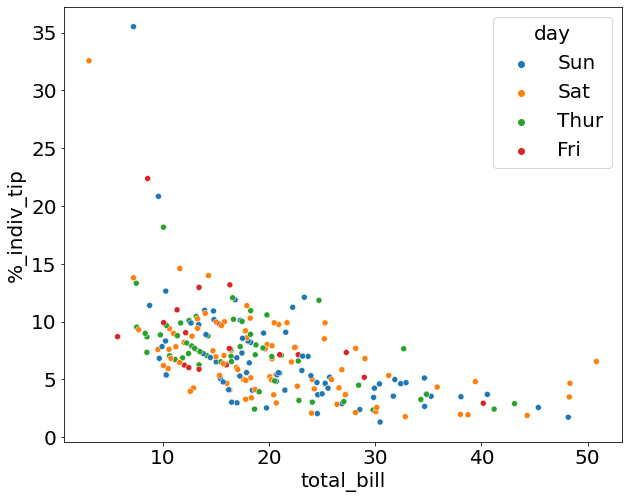

In [9]:
sns.scatterplot(x='total_bill', y='%_indiv_tip', hue='day', data=tips)
plt.show()

Sembla que hi ha una correlació negativa entre el percentatge del compte per comensal i el compte. De totes maneres, la informació sembla massa aglomerada com per a extreure'n alguna conclusió. Provem a simplificar-la

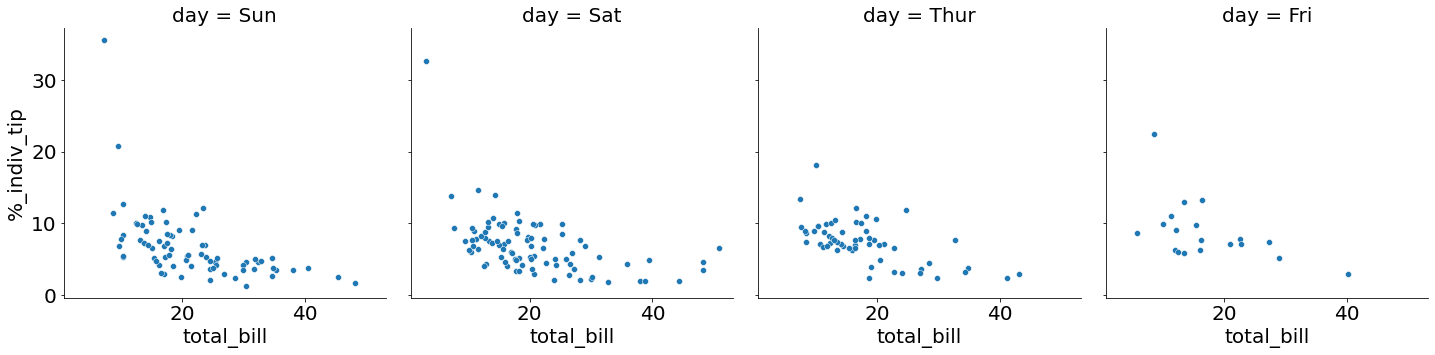

In [10]:
sns.relplot(x='total_bill', y='%_indiv_tip', col='day', data=tips)
plt.show()

La visualització sembla confirmar que com més gran és la propina, més repartida està entre els comensals.

### Cuatre variables: ``total_bill``, ``tip``, ``sex`` i ``smoker``

Per últim veurem si hi ha alguna correlació imprevista entre aquestes variables.

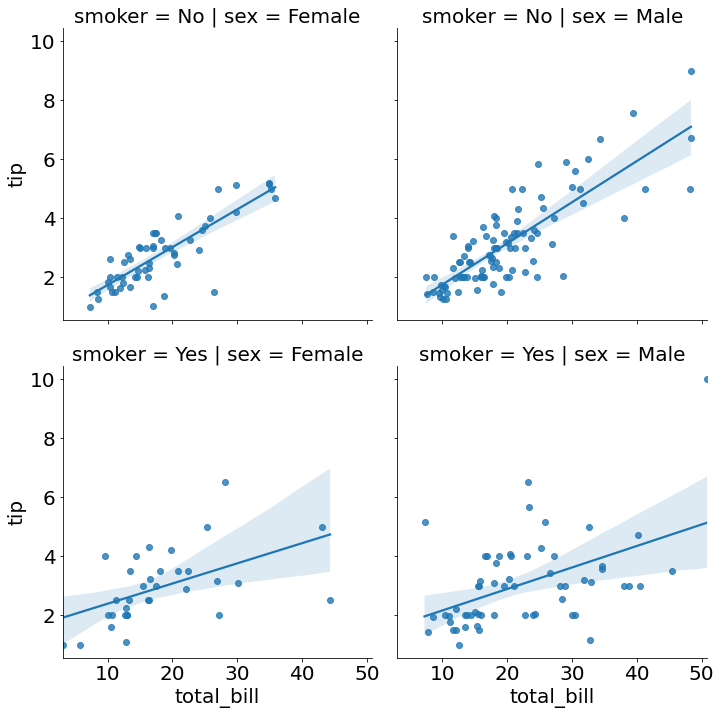

In [11]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='smoker', data=tips)
plt.show()

Sembla ser que la correlació entre el compte i la propina és més feble quan es tracta de fumadors. Tot i així, és possible que aquest fet es degui a la falta d'observacions amb aquestes característiques dins de la mostra.

## Exercici 2: Dataset ``movies.dat``

Abordaré aquest exercici a mode d'anàlisi exploratori de les dades, intentant respondre a les següents preguntes sobre el dataset a mesura que avançem:

* Quin període cobreix aquest dataset?
* Quins són els gèneres més comuns?
* Quins són els gèneres més comuns amb els anys? Canvia la seva distribució?
* Quins gèneres han guanyat popularitat? Quins n'han perdut?
* Quins gèneres tenen la correlació positiva més forta? I negativa?

En primer lloc hem de pre-processar les dades.

In [12]:
movies = pd.read_table('movies.dat', sep='::', header=None, 
                       names=['movie_id', 'title', 'genre'], engine='python')

Eliminem la columna ``movie_id``, el que ens estalviarà problemes més endavant ja que no es correspon amb els indexos.

In [13]:
movies.drop('movie_id', axis=1, inplace=True)
movies.head()

,title,genre
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


Extraurem l'any de la columna ``title`` i crearem una columna nova utilitzant RegEx:

In [14]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.replace('\(\d{4}\)', '', regex=True, inplace=True)
movies['year'] = pd.to_numeric(movies['year'])
movies.head()

,title,genre,year
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995


Extraurem tots els gèneres únics i els compilarem en una llista:

In [15]:
genre_list = []
for genre in movies.genre:
    genre_list.extend(genre.split('|'))
genre_list = pd.unique(genre_list)

In [16]:
genre_list

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

Crearem un dataframe per a aparellar la llista de gèneres amb els corresponents gèneres de la columna ``genre``.

In [17]:
genres = pd.DataFrame(np.zeros((len(movies), len(genre_list))), columns=genre_list)
for i, gen in enumerate(movies.genre):
    indices = genres.columns.get_indexer(gen.split('|'))
    genres.iloc[i, indices] = 1

Unim el dataframe booleà de gèneres amb el dataframe amb el que treballarem:

In [18]:
movies = movies.join(genres)
movies.head()

,title,genre,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,Toy Story,Animation|Children's|Comedy,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jumanji,Adventure|Children's|Fantasy,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Grumpier Old Men,Comedy|Romance,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Waiting to Exhale,Comedy|Drama,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Father of the Bride Part II,Comedy,1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ja hem pre-processat les dades! Ara ja podem començar a analitzar i crear visualitzacions.

### Quins anys cobreix el dataset?

In [19]:
print(f"{movies['year'].min()} - {movies['year'].max()}")

1919 - 2000


1919? Serà un error?

In [20]:
movies[movies.year == 1919]

,title,genre,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
2752,Male and Female,Adventure|Drama,1919,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2754,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Action|Drama,1919,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,Daddy Long Legs,Comedy,1919,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sembla ser que no! Una consulta ràpida a Google ens confirma que aquestes pel·lícules son del 1919:

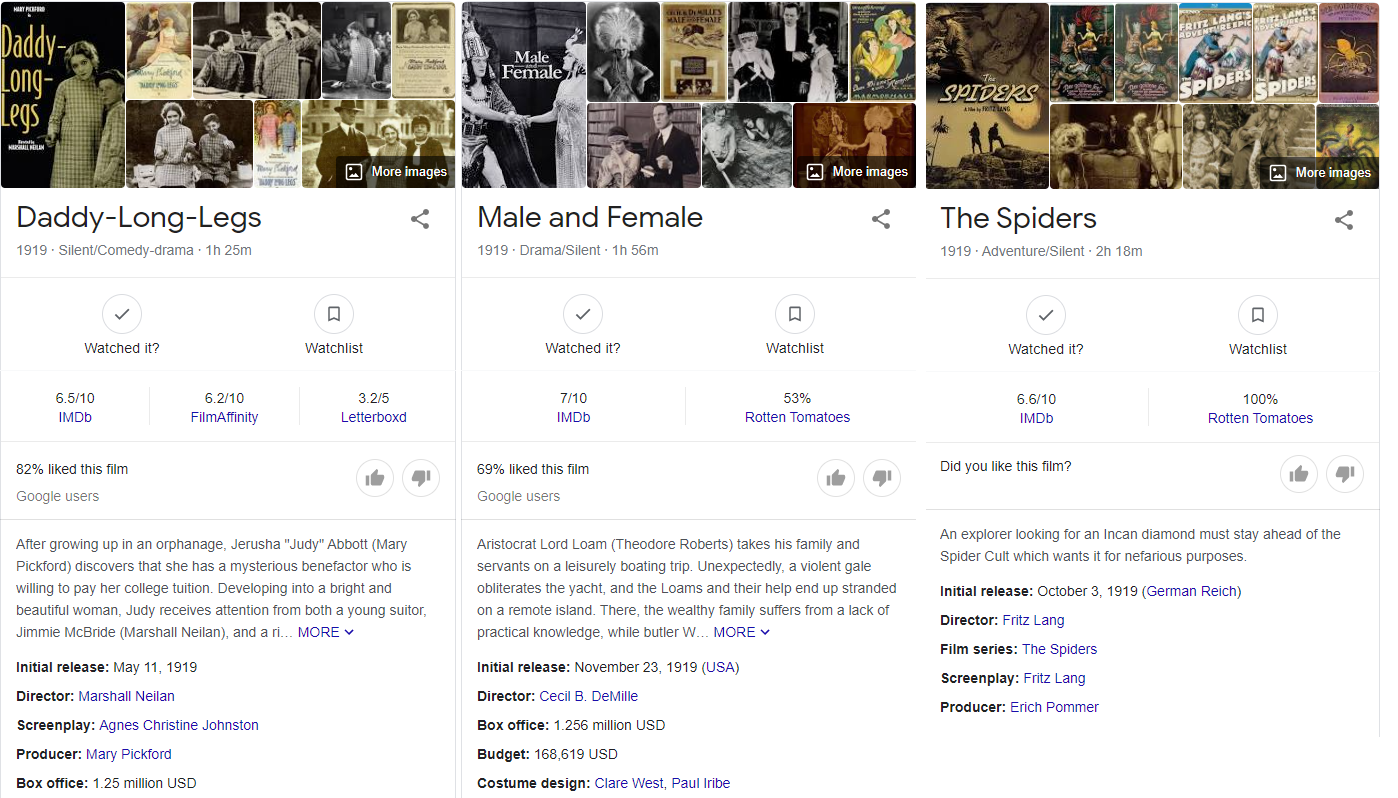

Així doncs, quins anys cobreix aquest dataset?

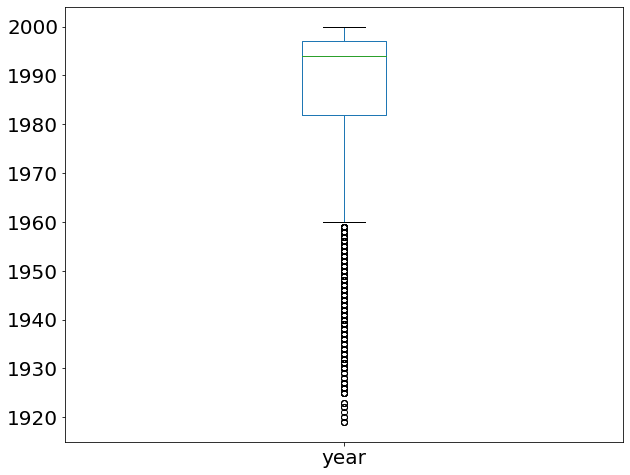

In [21]:
movies['year'].plot(kind='box');

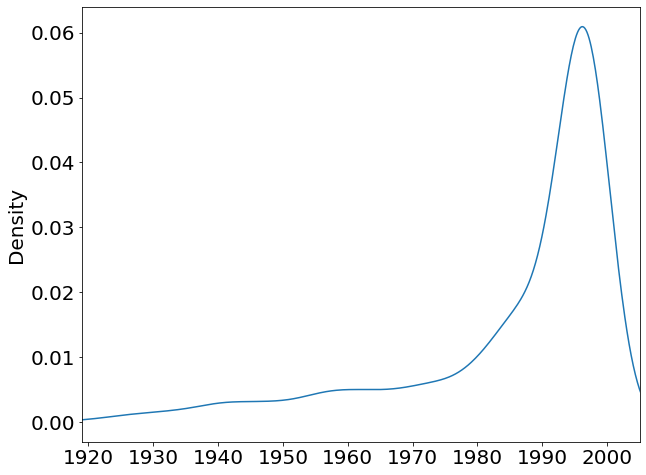

In [22]:
movies['year'].plot(kind='kde', xlim=(1919,2005));

Sembla ser que hi han algunes pel·lícules anteriors a 1960, però que són excepcions, amb la majoria de les películes situades entre 1980 i el 2005.

### Quins són els gèneres més comuns?

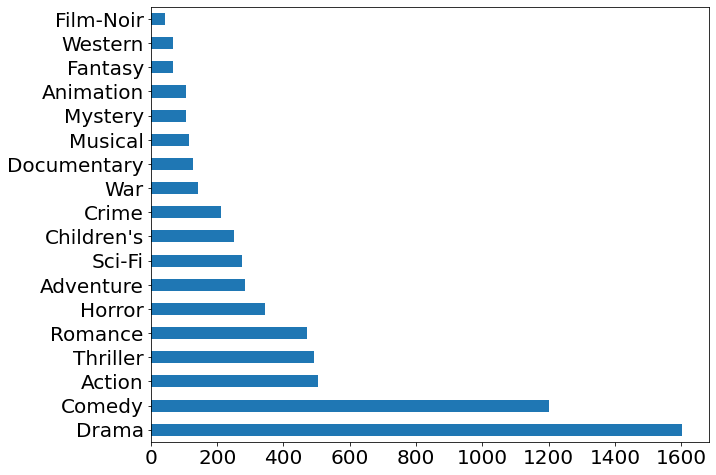

In [23]:
genres.sum().sort_values(ascending=False).plot(kind='barh');

Així doncs, veiem que els gèneres més comuns amb diferència són ``Comedy`` i ``Drama``. Una possible explicació és que són termes utilitzats per englobar una gran varietat de subgèneres.

### Quins són els gèneres més comuns per any? Canvia la distribució al llarg dels anys?

In [24]:
movie_stack = movies.groupby('year').mean()

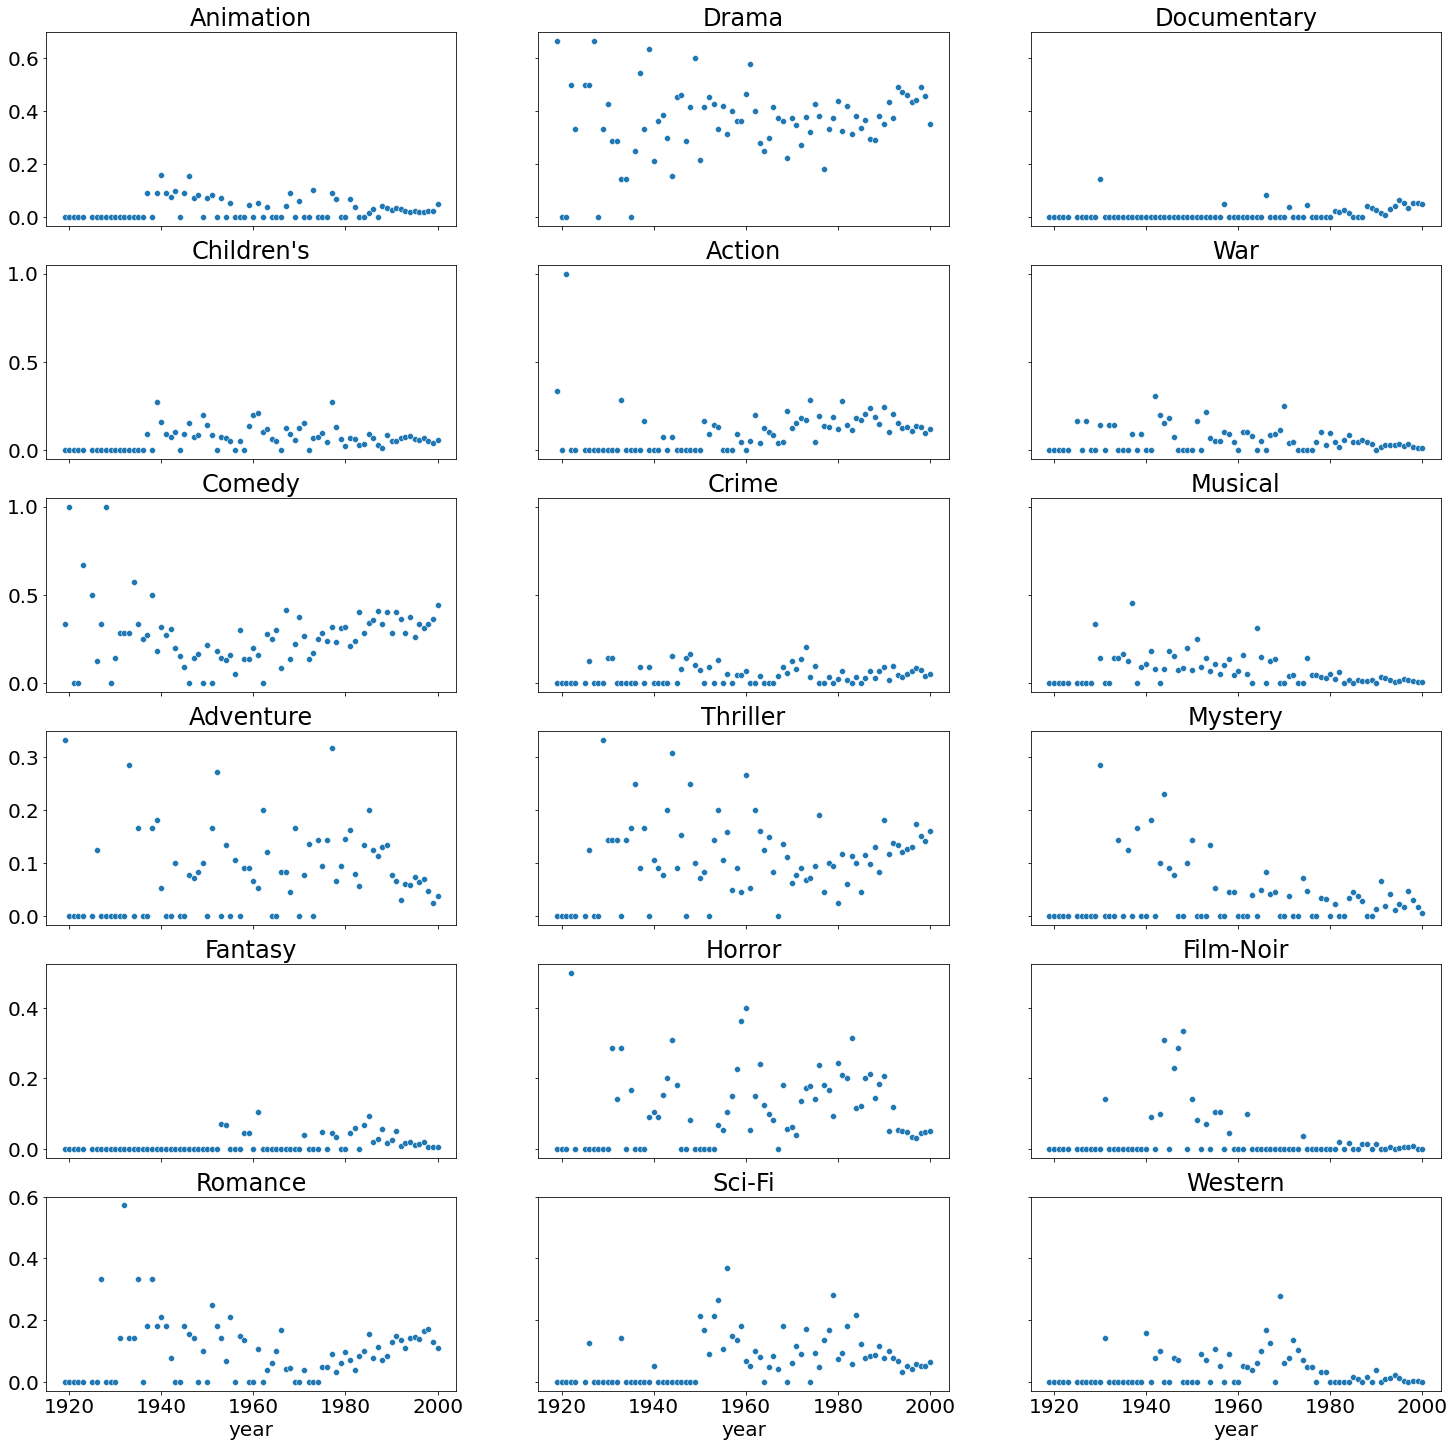

In [25]:
fig, ax = plt.subplots(6,3, sharex='col', sharey='row', figsize=(25,25))
x = y = 0
for genre in movie_stack:
    sns.scatterplot(x=movie_stack.index, y=genre, data=movie_stack, ax=ax[x,y])
    ax[x,y].set_title(genre)
    ax[x,y].yaxis.label.set_visible(False)
    if x < 5:
        x += 1
    else:
        x = 0
        y += 1

plt.show()

Podem veure que gèneres com ``Drama``, ``Comedy``, ``Adventure``, ``Thriller``, ``Crime`` i ``Horror`` han mantingut la seva popularitat amb els anys, mentre que gèneres com ``Mystery``, ``Musical``, ``Film-Noir`` i ``Western`` n'han perdut.

Una possible causa que explica la baixada de ``Mystery`` i ``Film-Noir`` és que els termes en sí han perdut popularitat amb el temps, sent ``Thriller`` o ``Crime`` altres termes utilitzats per a aquests mateixos gèneres.

### Quins gèneres tenen la correlació positiva més forta? I negativa?

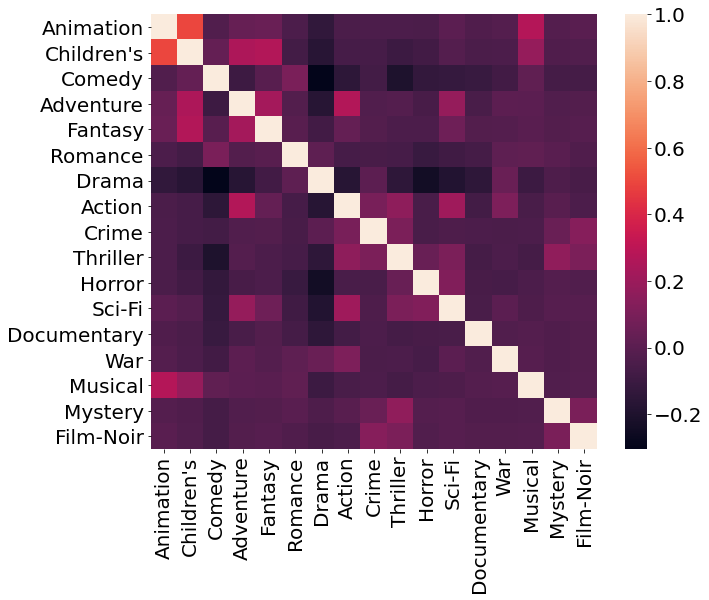

In [26]:
sns.heatmap(movies.iloc[:, 3:-1].corr());

Els únics gèneres que destaquen per tenir una correlació positiva molt forta són ``Animation`` i ``Children's`` (que discutiblement són gèneres).

En canvi, podem veure parelles de gèneres com ``Comedy, Drama``, ``Comedy, Thriller`` i ``Drama, Horror`` tenen una considerable correlació negativa.